# **Competition Description**
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Required Libraries**

In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# **Load Data**

In [3]:
#Read Data
df =pd.read_csv('/content/drive/MyDrive/PROJECTS DATASET/dataset1-master/dataset1-master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# **Data Analysis**

In [5]:
#Shape(Rows,columns)
df.shape

(891, 12)

In [6]:
# Datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Duplicated Entries
df.duplicated().sum()

0

# **Missing Values**

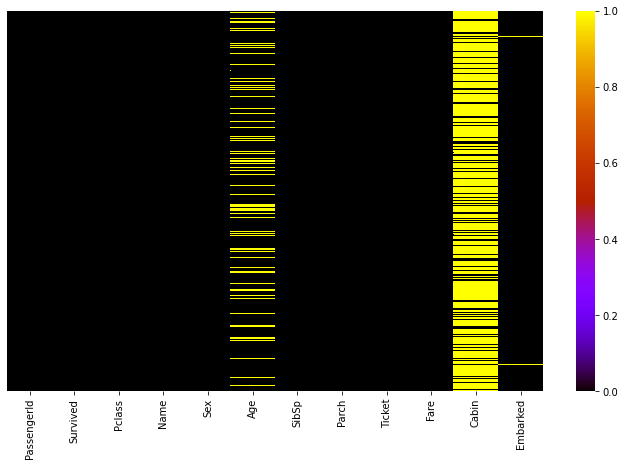

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),yticklabels=False,cmap='gnuplot')

In [10]:
#Confirmation
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Exploratory Data Analysis**
Lets further explore to have better understanding and gain more insights about the data to extract relevant informations.

In [11]:
# Features
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# Survived count
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
#Count of passengers based on Pclass
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
#Gender count
df['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [15]:
#Overview Ages of passengers
print(df['Age'].min())
print(df['Age'].mean())
print(df['Age'].max())

0.42
29.69911764705882
80.0


In [16]:
print('Count of SibSp :\n',df['SibSp'].value_counts())
print()
print('Count of Parch :\n', df['Parch'].value_counts())

Count of SibSp :
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Count of Parch :
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [17]:
# max_value seems to be an outlier
print(df['Fare'].min())
print(df['Fare'].mean())
print(df['Fare'].max())

0.0
32.2042079685746
512.3292


In [18]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
E101           3
              ..
C111           1
D30            1
D28            1
C7             1
A10            1
Name: Cabin, Length: 147, dtype: int64

In [19]:
# Types of Cabin
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [20]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# **Observations:**
- There are (891,12)records in the dataset
- No duplicated Entries
- Around 20% and 80% missing values are present in the Age & Cabin columns
- More number male passengers in comparison to female passengers
- Three classes of passengers 1st,2nd & 3rd Class
- Youngest passenger age is 3.6Yrs while eldest being 80yrs old
- Cabin seems to be Room number with unique indicators
- Three places of embarked S,C & Q


# **Descriptive Statistics**

In [21]:
#Statistical Summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
50%       14.454200
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: Fare, dtype: float64


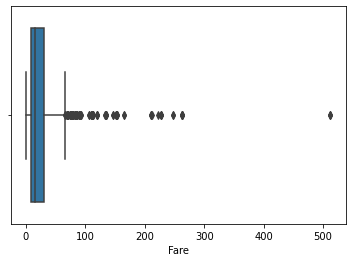

In [22]:
# check outliers
print(df['Fare'].describe(percentiles=[0.9,0.95,0.99]))
sns.boxplot(df['Fare'])

In [23]:
# Correlation
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# **Visualizations**

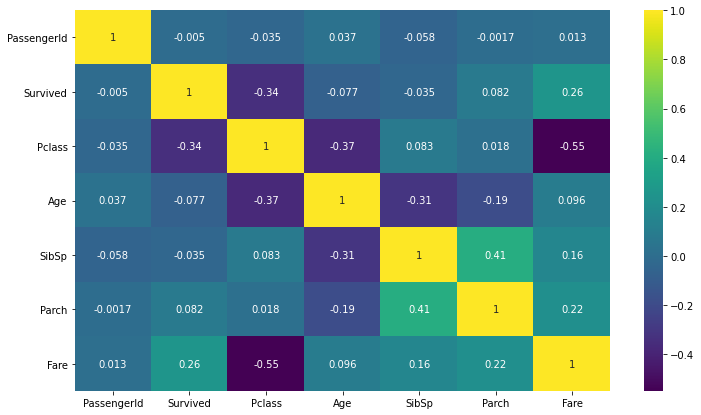

In [24]:
#Visual correlation
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

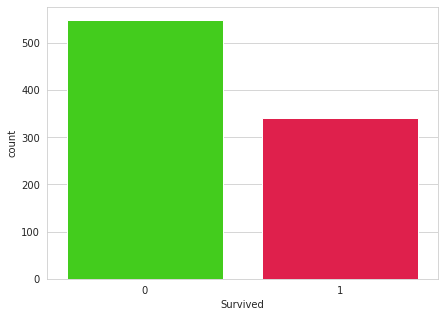

In [25]:
# Survived Count
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='prism')

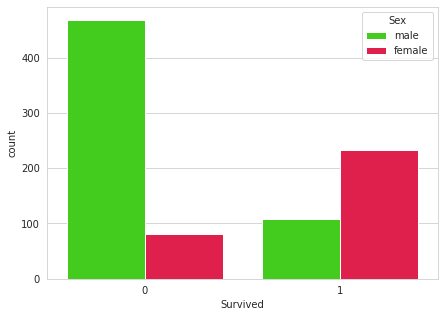

In [26]:
# Survived count based on Gender
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='prism')

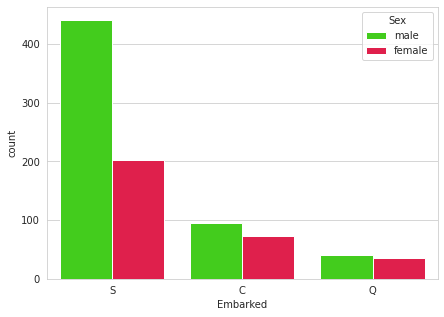

In [27]:
# Embarked count based on Gender
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue='Sex',data=df,palette='prism')

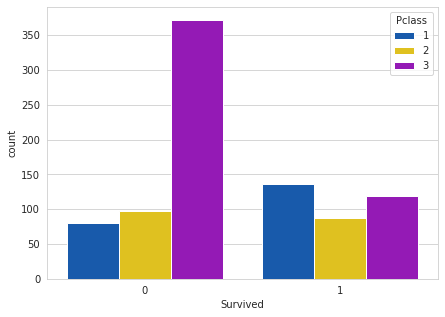

In [28]:
# Survived count based on Pclass
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='prism')

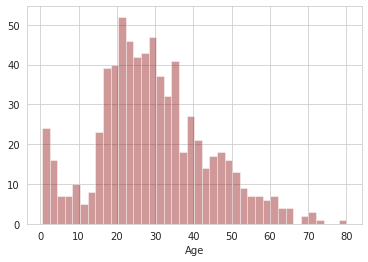

In [29]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

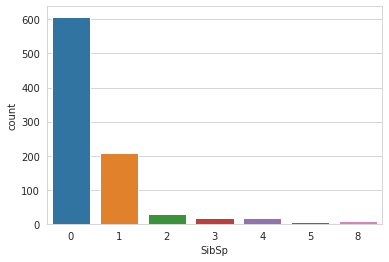

In [30]:
#count of SibSp
sns.countplot(x='SibSp',data=df)

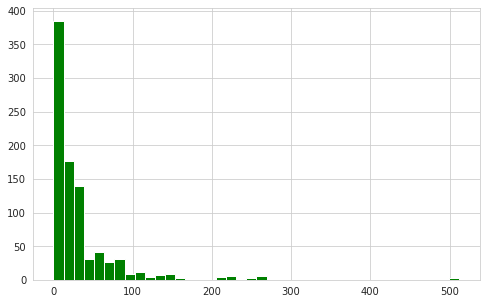

In [31]:
df['Fare'].hist(color='green',bins=40,figsize=(8,5))

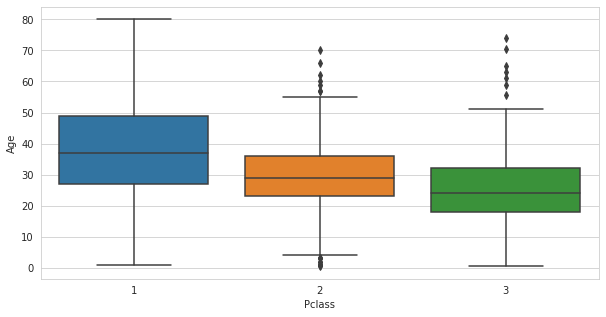

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',y='Age',data=df)

# **Visual Inferences :**
- Fare with $512 value is an outlier in that Column
- More number deaths are males and majority is from 3rd Class while more no. of survivals are Female mostly from 1st Class
- Most passengers embarked from southampton 
- Histogram shows most travellers are in the age between 20-36Yrs
- Many travells alone
- Fare is highly right skewed 
- Average age of the passengers also differ based on PClass

# **Feature Engineering**
Here, we will be imputing some features droping some unnecessary columns in order to built perfect model

In [33]:
# Imputing Missing Values on Age column
# We can see the wealthier pasengers in the higher classes tend to be older,which make sense. We'll use these average age values to impute based on Pclass for Age
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37

    elif Pclass == 2:
      return 29

    else:
      return 24
    
  else:
      return Age

In [34]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

# **Feature Engineering the Cabin**

In [35]:
#Count of cabin
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
E101           3
              ..
C111           1
D30            1
D28            1
C7             1
A10            1
Name: Cabin, Length: 147, dtype: int64

So even within the values we have the data is messy. So I think it is a perfectly reasonable decision to throw this column out due to these criticisms. However, this notebook is not to justify throwing the data out but to see if we can glean anything from keeping it

# Digging into the Cabin Data
From the previous cell it appears as if most of the cabins consist of a single letter at the beginning followed by a 2 or three digit number. It seems logical that the letter would represent the deck or section of boat where the cabin was located followed by the room number. It would seem that if you knew the section of the boat where someone was staying it would give you a lot of insight into their chances of survival. With that in mind let's work on cleaning up that column and seeing what we can get out of it

In [36]:
cabin_only = df[["Cabin"]].copy()
cabin_only["Cabin_Data"] = cabin_only["Cabin"].isnull().apply(lambda x: not x)

We'll then take just the first character and assign it to a new column named "Deck" and take the any numerical sequence right after this letter and assign it to "room

In [37]:
cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)
cabin_only["Room"] = cabin_only["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
cabin_only[cabin_only["Cabin_Data"]]

,Cabin,Cabin_Data,Deck,Room
1,C85,True,C,85.0
3,C123,True,C,123.0
6,E46,True,E,46.0
10,G6,True,G,6.0
11,C103,True,C,103.0
...,...,...,...,...
871,D35,True,D,35.0
872,B51 B53 B55,True,B,51.0
879,C50,True,C,50.0
887,B42,True,B,42.0


In [38]:
cabin_only[cabin_only["Deck"]=="F"]

,Cabin,Cabin_Data,Deck,Room
66,F33,True,F,33.0
75,F G73,True,F,73.0
128,F E69,True,F,69.0
148,F2,True,F,2.0
183,F4,True,F,4.0
193,F2,True,F,2.0
340,F2,True,F,2.0
345,F33,True,F,33.0
516,F33,True,F,33.0
618,F4,True,F,4.0


Looking through the result there are some things which aren't ideal.

- Any entries which have a letter space letter form are only returning the first letter. This looks like it often happens when therer is an "F" in that first character slot. however, this only occurs in four total cells so we will ignore it for now.
- Some entries look like they contain multiple cabins or rooms. For these we are only getting the data for the first one that occurs. However by inspecting the data it appears that in these cases they all share the same deck and the room numbers are all fairly close. So while this may affect our analysis it should be minimal.

# **One Hot Encoding**
We'll now deal with the missing values and then convert the deck feature a series of one hot encoded columns.

First we'll drop the Cabin and Cabin_Data columns

In [39]:
cabin_only.drop(["Cabin", "Cabin_Data"], axis=1, inplace=True, errors="ignore")

Now we'll deal with the missing values. For the deck column we will replace the null values with an unused letter to represent lack of data. For the room number we will simply use the mean.

In [40]:
cabin_only["Deck"] = cabin_only["Deck"].fillna("N")
cabin_only["Room"] = cabin_only["Room"].fillna(cabin_only["Room"].mean())

In [41]:
cabin_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Deck    891 non-null    object 
 1   Room    891 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.0+ KB


In [42]:
#We will now use one hot encoding on the deck column.
def one_hot_column(df, label, drop_col=False):
    '''
    This function will one hot encode the chosen column.
    Args:
        df: Pandas dataframe
        label: Label of the column to encode
        drop_col: boolean to decide if the chosen column should be dropped
    Returns:
        pandas dataframe with the given encoding
    '''
    one_hot = pd.get_dummies(df[label], prefix=label)
    if drop_col:
        df = df.drop(label, axis=1)
    df = df.join(one_hot)
    return df


def one_hot(df, labels, drop_col=False):
    '''
    This function will one hot encode a list of columns.
    Args:
        df: Pandas dataframe
        labels: list of the columns to encode
        drop_col: boolean to decide if the chosen column should be dropped
    Returns:
        pandas dataframe with the given encoding
    '''
    for label in labels:
        df = one_hot_column(df, label, drop_col)
    return df

In [43]:
cabin_only = one_hot(cabin_only, ["Deck"],drop_col=True)

In [44]:
cabin_only.head()

,Room,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
0,50.49,0,0,0,0,0,0,0,1,0
1,85.00,0,0,1,0,0,0,0,0,0
2,50.49,0,0,0,0,0,0,0,1,0
3,123.00,0,0,1,0,0,0,0,0,0
4,50.49,0,0,0,0,0,0,0,1,0


So there we have it 10 columns of data extracted from the origional cabin column. Now let's see if any of these are of use in predicted survival.

In [45]:
for column in cabin_only.columns.values[1:]:
    df[column] = cabin_only[column]

In [46]:
# One Hot Encoding the Gender & Embarked columns
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

# **Feature Selection**
Here, We select the Features that are necessary for building the model and drop the rest that does not provide any relevant information.

In [47]:
# Droping some unnecessary columns
df.drop(['PassengerId','Name','Ticket','Cabin','Sex','Embarked'],axis=1,inplace=True)

In [48]:
# Concatenating 
df = pd.concat([df,sex,embark],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,male,Q,S
0,0,3,22.0,1,0,7.2500,0,0,0,0,0,0,0,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,1,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,0,0,0,0,1,0,1,0,1


Great! Our data is ready for our model

# **Model Building**
Let's start by importing required machine learning algorithmsand split our data into training & testing set.

In [49]:
# Importing Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
# Splitting the dataset into training & testing part
X = df.iloc[:,1:]
Y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30,random_state = 101)

# **Predicting the results**

# **Logistic Regression**

In [51]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
LR_prediction = LR.predict(x_test)
accuracy = accuracy_score(y_test,LR_prediction)
print(accuracy)

0.7947761194029851


In [53]:
cm = confusion_matrix(y_test,LR_prediction)
print(cm)

[[135  19]
 [ 36  78]]


In [54]:
CR = classification_report(y_test,LR_prediction)
print(CR)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       154
           1       0.80      0.68      0.74       114

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.79      0.79       268



# **Support Vector Machine**

In [55]:
svc = SVC()
svc.fit(x_train,y_train)
svc_prediction =svc.predict(x_test)
svc_accuracy =accuracy_score(y_test,svc_prediction)
print(svc_accuracy)

0.6529850746268657


In [56]:
svc_cm = confusion_matrix(y_test,svc_prediction)
print(svc_cm)

[[143  11]
 [ 82  32]]


In [57]:
svc_CR = classification_report(y_test,svc_prediction)
print(svc_CR)

              precision    recall  f1-score   support

           0       0.64      0.93      0.75       154
           1       0.74      0.28      0.41       114

    accuracy                           0.65       268
   macro avg       0.69      0.60      0.58       268
weighted avg       0.68      0.65      0.61       268



# **K-nearest Neighbors**

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_prediction =knn.predict(x_test)
knn_accuracy =accuracy_score(y_test,knn_prediction)
print(knn_accuracy)

0.6902985074626866


In [59]:
knn_cm = confusion_matrix(y_test,knn_prediction)
print(knn_cm)

[[126  28]
 [ 55  59]]


In [60]:
knn_CR = classification_report(y_test,knn_prediction)
print(knn_CR)

              precision    recall  f1-score   support

           0       0.70      0.82      0.75       154
           1       0.68      0.52      0.59       114

    accuracy                           0.69       268
   macro avg       0.69      0.67      0.67       268
weighted avg       0.69      0.69      0.68       268



# **GaussianNB**

In [61]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb_prediction =gnb.predict(x_test)
gnb_accuracy =accuracy_score(y_test,gnb_prediction)
print(gnb_accuracy)

0.7686567164179104


In [62]:
gnb_cm = confusion_matrix(y_test,gnb_prediction)
print(gnb_cm)

[[132  22]
 [ 40  74]]


In [63]:
gnb_CR = classification_report(y_test,gnb_prediction)
print(gnb_CR)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.65      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



# **Decision Tree**

In [64]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
DTC_prediction =DTC.predict(x_test)
DTC_accuracy =accuracy_score(y_test,DTC_prediction)
print(DTC_accuracy)

0.8059701492537313


In [65]:
DTC_cm = confusion_matrix(y_test,DTC_prediction)
print(DTC_cm)

[[132  22]
 [ 30  84]]


In [66]:
DTC_CR = classification_report(y_test,DTC_prediction)
print(DTC_CR)

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       154
           1       0.79      0.74      0.76       114

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.80       268



## **Random Forest**

In [67]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
RF_prediction =RF.predict(x_test)
RF_accuracy =accuracy_score(y_test,RF_prediction)
print(RF_accuracy)

0.8059701492537313


In [68]:
RF_cm = confusion_matrix(y_test,RF_prediction)
print(RF_cm)

[[134  20]
 [ 32  82]]


In [69]:
RF_CR = classification_report(y_test,RF_prediction)
print(RF_CR)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       154
           1       0.80      0.72      0.76       114

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



## **Hyper Tuning the Parameters**

In [70]:
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

In [71]:
# define models and parameters
LR = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LR, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.812161 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.805189 (0.054203) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.798165 (0.052858) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.805189 (0.054203) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.806802 (0.056488) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.802509 (0.052008) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.808406 (0.054544) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.812161 (0.056273) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.806793 (0.052858) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.805752 (0.045865) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.800358 (0.046972) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.800870 (0.046488) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.799292 (0.034619) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.733487 (0.033716) wit

In [72]:
# define models and parameters
RF = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=RF, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.814311 using {'max_features': 'log2', 'n_estimators': 100}
0.793497 (0.046684) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.808449 (0.056640) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.813236 (0.048325) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.811128 (0.049160) with: {'max_features': 'log2', 'n_estimators': 10}
0.814311 (0.047936) with: {'max_features': 'log2', 'n_estimators': 100}
0.812707 (0.048438) with: {'max_features': 'log2', 'n_estimators': 1000}
